# IDS Assignment 1
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. 

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file in moodle.

## Get to know the data

### Question 1 (Indicating type): 
1. Identify precise type of each attribute. Note that the right answers are like: “numerical-continuous-ratio”, just Numerical or Categorical is not enough.

<font color='blue'>
Explanation:

| Attributes     | type                |
| -------------- | ------------------- |
| Age            | numeric-discrete    |
| workclass      | categorical-nominal |
| education      | categorical-ordinal |
| education-num  | numeric-discrete    |
| marital-status | categorical-nominal |
| occupation     | categorical-nominal |
| relationship   | categorical-nominal |
| race           | categorical-nominal |
| sex            | categorical-nominal |
| hours-per-week | numeric-discrete    |
| native-country | categorical-nominal |
| label          | categorical-ordinal |

### Question 2 (Removing outliers):
2. (a) Explore into "age" and "hours-per-week" and identify outliers (Boxplot returns whiskers). After identifying outliers, remove them (do it just once on the data set). Now you should have two data sets (cleaned and original).

In [1]:
# import all necessary packages
import os
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from DecisionTree import DecisionTree
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, r2_score

%matplotlib inline

In [2]:
# read data from file, make sure file is available
data_file = './data-set-assignment1/adult.data-3.csv'
df_original = pd.read_csv(data_file)

[Text(0, 0, 'age'), Text(0, 0, 'hours-per-week')]

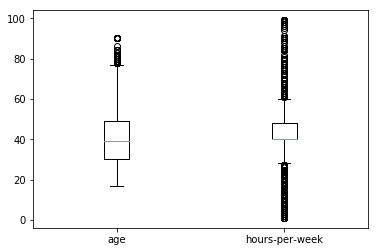

In [3]:
# visuilize outliers
data = [df_original['age'], df_original['hours-per-week']]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['age', 'hours-per-week'])

In [4]:
# draw boxplot, return whiskers tuple (lower_whisker, upper_whisker)
# Ref: https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib
age_box = plt.boxplot(df_original['age'])
age_whiskers = [item.get_ydata()[1] for item in age_box['whiskers']]

hours_box = plt.boxplot(df_original['hours-per-week'])
hours_whiskers = [item.get_ydata()[1] for item in hours_box['whiskers']]

# remove outliers --> value beyond upper_whisker and lower_whisker
df_cleaned = df_original.loc[(df_original['age'] <= age_whiskers[1]) &  
                             (df_original['age'] >= age_whiskers[0]) &
                             (df_original['hours-per-week'] <= hours_whiskers[1]) &
                             (df_original['hours-per-week'] >= hours_whiskers[0])
                            ]
plt.close() # hide boxplot

2. (b) Draw Boxplot of the cleaned data set for "hours-per-week". Is there still any outlier? If so, explain why?

{'whiskers': [<matplotlib.lines.Line2D at 0x1a15451390>,
 'caps': [<matplotlib.lines.Line2D at 0x1a15451a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a15451240>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1545a0f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1545a438>],
 'means': []}

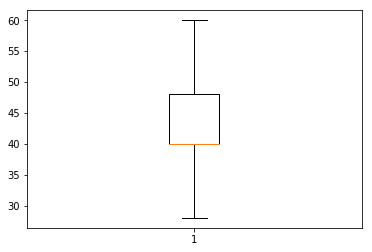

In [5]:
# draw boxplot on cleaned dataset
plt.boxplot(df_cleaned['hours-per-week'])

<font color='blue'>
Explanation:

**No, there are no outliers. In this case, as seen from the figure, the upper fence and the lower fence does not change. Therefore, after removing all outliers, there won't be any.** 

### Question 3 (Basic visualization):
3. (a) Visualize mean and median of "age", and "hours-per-week" per "sex" by separate plots for the cleaned and the original data sets (there should be 8 plots, 4 plots for the original data set and 4 plots for the cleaned data set). 

In [6]:
# visualize for mean/median of "age"/"hours-per-week"
def visualize(dataset):
    
    # calculate mean and median
    age_m_mean = dataset[dataset['sex']=='Male']['age'].mean()
    age_f_mean = dataset[dataset['sex']=='Female']['age'].mean()
    age_m_median = dataset[dataset['sex']=='Male']['age'].median()
    age_f_median = dataset[dataset['sex']=='Female']['age'].median()
    
    hours_m_mean = dataset[dataset['sex']=='Male']['hours-per-week'].mean()
    hours_f_mean = dataset[dataset['sex']=='Female']['hours-per-week'].mean()
    hours_m_median = dataset[dataset['sex']=='Male']['hours-per-week'].median()
    hours_f_median = dataset[dataset['sex']=='Female']['hours-per-week'].median()
    
    fig = plt.figure()
    # set plot position and title
    ax1 = fig.add_subplot(221)
    ax1.set_title('Mean of age per sex')
    ax1.text(0, 30, round(age_m_mean, 2), fontsize=9, color='red', ha="center")
    ax1.text(1, 30, round(age_f_mean, 2), fontsize=9, color='red', ha="center")
    ax2 = fig.add_subplot(222)
    ax2.set_title('Median of age per sex')
    ax2.text(0, 30, round(age_m_median, 2), fontsize=9, color='red', ha="center")
    ax2.text(1, 30, round(age_f_median, 2), fontsize=9, color='red', ha="center")
    ax3 = fig.add_subplot(223)
    ax3.set_title('Mean of hours-per-week per sex')
    ax3.text(0, 30, round(hours_m_mean, 2), fontsize=9, color='red', ha="center")
    ax3.text(1, 30, round(hours_f_mean, 2), fontsize=9, color='red', ha="center")
    ax4 = fig.add_subplot(224)
    ax4.set_title('Median of hours-per-week per sex')
    ax4.text(0, 30, round(hours_m_median, 2), fontsize=9, color='red', ha="center")
    ax4.text(1, 30, round(hours_f_median, 2), fontsize=9, color='red', ha="center")
    
    
    # barplot default estimator is mean
    sns.barplot(x="sex", y="age", data=dataset, ax=ax1)
    # changing estimator to median
    sns.barplot(x="sex", y="age", data=dataset,
                estimator=np.median, ax=ax2)

    sns.barplot(x="sex", y="hours-per-week", data=dataset, ax=ax3)
    sns.barplot(x="sex", y="hours-per-week",
                data=dataset, estimator=np.median, ax=ax4)

    # adjust the space between subplots
    # wspace/hspace : the amount of width/height reserved for blank space between subplots
    plt.subplots_adjust(hspace=0.6, wspace=0.6)

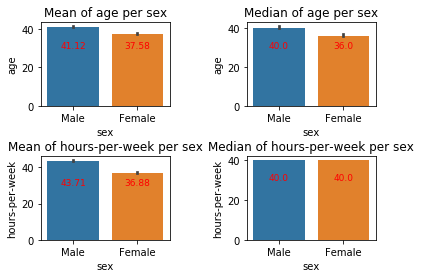

In [7]:
# plots based on original dataset
visualize(df_original)

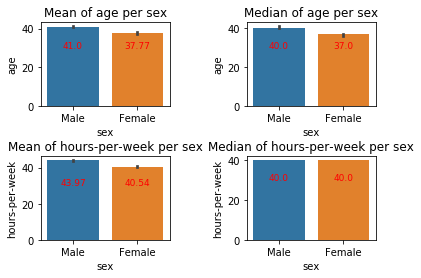

In [8]:
# plots based on cleaned dataset
visualize(df_cleaned)

3. (b) Explain how mean and median of "age" per "sex" change when you remove the outliers.

<font color='blue'>
Explanation: 

**For "age", compared to those values after removing outliers, the median value of male does not change, while the value increase by 1 for female. The mean value for male decrease by 0.12, while the mean value for female increase by 0.19. In general, the changes are quite small, which means this dataset is not so sensitive to outliers.**


### Question 4 (Distribution):
4. (a) Explore into distribution of "age" in the original data set. Does it have any well-known distribution (normal, uniform, skewed, ...)? If so, what are the main statistical features (mean, median, and mode) of this specific type of distribution.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(80, 0.03, 'Right skewed Distribution')

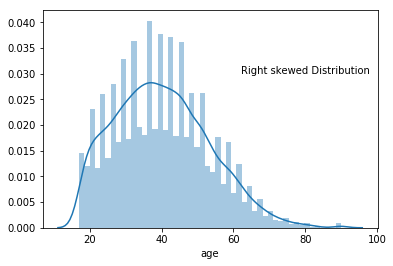

In [9]:
# Unimodal (right skewed) Distribution
sns.distplot(df_original['age']).text(80, 0.03, 'Right skewed Distribution', ha='center', fontsize=10)

In [10]:
# main statistic features
age_mean = df_original['age'].mean()
age_media = df_original['age'].median()
age_mode = df_original['age'].mode()[0]
age_std = df_original['age'].std()

print('Age Mean: {0:.1f}'.format(age_mean))
print('Age Median: {0:.1f}'.format(age_media))
print('Age Mode: {0:.1f}'.format(age_mode))
print('Age Standard deviation: {0:.1f}'.format(age_std))

Age Mean: 40.1
Age Median: 39.0
Age Mode: 37.0
Age Standard deviation: 13.2


<font color='blue'>
Explanation:

**The distribution is Unimodal (right skewed)**
- Age Mean:  40.1 
- Age Median:  39.0 
- Age Mode:  37.0 
- Age Standard deviation:  13.2

4. (b) Explore into distribution of "age" and "hours-per-week" together. Explain how the data is distributed with respect to these two attributes in the original data sets (using Jointplot)?


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


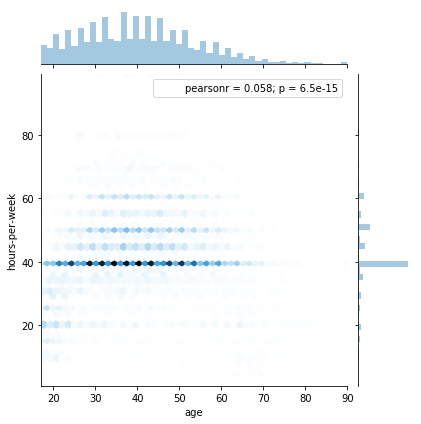

In [11]:
# joint plot with respect to "age" and "hours-per-week"
sns.jointplot(x="age", y="hours-per-week", data=df_original, kind="hex");  

<font color='blue'>
Explanation:

**From age perspective, it is right skewed unimodal distribution. From hours-per-week perspective, it is the uniform distribution, which indicates that most values are concentrated on 40. According to the pearsonr correlation, we could argue these two attributes have seldom relation, since the majority work 40 hours per week no matter the age.** 

## Building models to perform predictions

### Question 5 (Decision Tree):
5. (a) Consider all the categorical attributes except label as descriptive features and label (income) as target feature. Make two decision trees (one based on Entropy and another based on Gini).

In [12]:
# descriptive features
X = df_original[['workclass','education', 'marital-status', 
                 'occupation', 'relationship', 'race', 'sex', 'native-country']] 
# target feature
y = df_original["label"]

entropy_tree = DecisionTree(X.values.tolist(), X.columns.tolist(), y.values.tolist(), "entropy")
entropy_tree.id3(0,0)

gini_tree = DecisionTree(X.values.tolist(), X.columns.tolist(), y.values.tolist(), "gini")
gini_tree.id3(0, 0)

5. (b) What are the best attributes (based on Gini and Entropy) for splitting the trees in the third round of ID3?   

In [13]:
# visualize decision tree
entropy_tree.print_visualTree() # 'Education' are the best attribute

In [14]:
# visualize decision tree
gini_tree.print_visualTree() # 'Education' are the best attribute

<font color='blue'>
Explanation:

Entropy Decision Tree best attribute on round 3:  **Education**

Gini Decision Tree best attribute on round 3:  **Education**

5. (c) Prune the tree which is made based on Entropy by 7000 as minimum number of samples. Identify which value of the first node/attribute is chosen to be split in the second round of ID3 and explain why?

In [15]:
# prune decision tree with minimum 7000 samples
entropy_tree_7k = DecisionTree(X.values.tolist(), X.columns.tolist(), y.values.tolist(), "entropy")
entropy_tree_7k.id3(0,7000)
entropy_tree_7k.print_visualTree() # 'husband' is chosen to be split

<font color='blue'>
Explanation:

The first node chosen to be split in second round of ID3: **Husband**. 

**Because, in this round, "husband" has the lowest entropy, which means this attribute has the largest IG(information gain), and that's why it is chosen in this round**

### Question 6 (Regression):

6. (a) Create two sets of independent variables (1) and (2)

In [16]:
# target feature
target = df_original[["label"]]
# two sets of independent variables
df_set1 = df_original[['age', 'marital-status', 'sex']]
df_set2 = df_original[['workclass', 'education-num', 'hours-per-week']]
# all descriptive features
df_init = df_original.iloc[:, :-1] # or df_init = df_original.drop('lable', axis=1)

6. (b) Which attributes are suitable as an input for the logistic regression and which need to be modified first? Why?

<font color='blue'>
Explanation: 

**Numeric features, such as "age", "education-num", "hours-per-week" are suitalbe as an input for logistic regression, however, categorical features like "marital-status", "sex", "workclass" are not appropriate. Because regression algorithm is based on numerical calculation, which requires categorical to be transformed into numerics first. **

In [17]:
# transform categorical features to numeric features
# use one hot encoding
df_set1 = pd.get_dummies(df_set1, drop_first=True)
df_set2 = pd.get_dummies(df_set2, drop_first=True)
df_init = pd.get_dummies(df_init, drop_first=True)
target = pd.get_dummies(target, drop_first=True)
target = np.array(target).reshape(-1,)

6. (c) Train three logistic regression classifiers based on the two created data sets as well as the initial data set:

In [18]:
# LogisticRegression from sklearn library
# For small datasets, ‘liblinear’ is a good choice
# for binary problem, choose "ovr" (one-versus-reset)

classifier1 = LogisticRegression( solver = 'liblinear', multi_class = 'ovr')
classifier1.fit(df_set1, target)

classifier2 = LogisticRegression( solver = 'liblinear', multi_class = 'ovr')
classifier2.fit(df_set2, target)

classifier3 = LogisticRegression( solver = 'liblinear', multi_class = 'ovr')
classifier3.fit(df_init, target)

print('All classifiers are using default parameters: ')
print(classifier3)

All classifiers are using default parameters: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


6. (d) Interpret the three resulting models and compare them. Which model do you recommend and why?

In [19]:
# get predicted label
clf1_pred = classifier1.predict(df_set1)
clf2_pred = classifier2.predict(df_set2)
clf3_pred = classifier3.predict(df_init)

# calculate metrics (accuracy, precision, recall, f1)
clf1_metric = [accuracy_score(target, clf1_pred), precision_score(target, clf1_pred),
               recall_score(target, clf1_pred),f1_score(target, clf1_pred)]
clf1_df = pd.DataFrame(clf1_metric, index=['Accuracy', 'Precision', 'Recall', 'F1'], 
                       columns=['Classifier based on datasets(1)'])

clf2_metric = [accuracy_score(target, clf2_pred), precision_score(target, clf2_pred),
               recall_score(target, clf2_pred),f1_score(target, clf2_pred)]
clf2_df = pd.DataFrame(clf2_metric, index=['Accuracy', 'Precision', 'Recall', 'F1'], 
                       columns=['Classifier based on datasets(2)'])

clf3_metric = [accuracy_score(target, clf3_pred), precision_score(target, clf3_pred),
               recall_score(target, clf3_pred),f1_score(target, clf3_pred)]
clf3_df = pd.DataFrame(clf3_metric, index=['Accuracy', 'Precision', 'Recall', 'F1'], 
                       columns=['Classifier based on initial datasets'])

pd.concat([clf1_df, clf2_df, clf3_df], axis=1)

,Classifier based on datasets(1),Classifier based on datasets(2),Classifier based on initial datasets
Accuracy,0.750238,0.701698,0.807802
Precision,0.670942,0.679954,0.770078
Recall,0.847213,0.606938,0.802194
F1,0.748845,0.641375,0.785808


<font color='blue'>
Explanation:

**According to the metrics (Accuracy, Precision, Recall, F1), except for the recall score, classifier3 obtain the best results for the other metrics. Therefore, we would like to choose model 3, which is trained on original dataset.**

### Question 7 (Neural Networks)

7. (a) What are the inputs of your network?

<font color='blue'>
Explanation:

**All the descriptive features are the inputs of the network.**

7. (b) What are the possible number of input pattern for your network (just including categorical attributes)?

<font color='blue'>
Explanation:

**Input patterns**
- just include all nuemric features
- just include partial numeric features
- just include all categorical features
- just include partial categorical features
- include all numeric and all categorical features
- include partial nemeric and partial categorical features

7. (c.i) First, with default parameters and return the parameters.

In [20]:
# define target feature and desciptive features
target = pd.get_dummies(df_original['label'], drop_first=True)
target = np.array(target).reshape(-1,)
features = pd.get_dummies(df_original.drop('label', axis=1), drop_first=True)

# try to keep the results consistent
np.random.seed(0)

# use Multi-layer Perceptron classifier
mlp = MLPClassifier() 
mlp.fit(features, target)  

print('Default parameters:')
print(mlp)

Default parameters:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


7. (c.ii) Second, try to find the optimized number of hidden layers and nodes. (Start with default number and then at least go with one number above and one number below the default) 


In [21]:
# try to keep the results consistent
np.random.seed(0)

# lower number of hidden layers
mlp_low = MLPClassifier(hidden_layer_sizes=(50)) 
mlp_low.fit(features, target)

# higher number of hidden layers
mlp_high = MLPClassifier(hidden_layer_sizes=(50, 50, 50)) 
mlp_high.fit(features, target) 


low_pred = mlp_low.predict(features)
default_pred = mlp.predict(features)
high_pred = mlp_high.predict(features)

# calculate all metrics (Accuracy, Precision, Recall, F1)
low_metric = [accuracy_score(target, low_pred), precision_score(target, low_pred),
              recall_score(target, low_pred), f1_score(target, low_pred)]
low_df = pd.DataFrame(low_metric, index=['Accuracy', 'Precision', 'Recall', 'F1'], 
                       columns=['One Layer (50 nodes)'])
default_metric = [accuracy_score(target, default_pred), precision_score(target, default_pred),
              recall_score(target, default_pred), f1_score(target, default_pred)]
default_df = pd.DataFrame(default_metric, index=['Accuracy', 'Precision', 'Recall', 'F1'], 
                       columns=['Default One Layer (100 nodes)'])
high_metric = [accuracy_score(target, high_pred), precision_score(target, high_pred),
              recall_score(target, high_pred), f1_score(target, high_pred)]
high_df = pd.DataFrame(high_metric, index=['Accuracy', 'Precision', 'Recall', 'F1'], 
                       columns=['Three Layers (50 nodes)'])
pd.concat([low_df, default_df, high_df], axis=1)

,One Layer (50 nodes),Default One Layer (100 nodes),Three Layers (50 nodes)
Accuracy,0.806121,0.813239,0.810325
Precision,0.794094,0.779057,0.736195
Recall,0.754496,0.802704,0.885856
F1,0.773789,0.790704,0.804121


In [22]:
# Assume three layers should be enough to get desirable results
def optimize_params(features, target):
    
    """
        params: 
        ------------
        features: descriptive features for training multiple perceptron layer classifier
        target: target feature of dataset
        
        returns:
        -------------
        best parameter for layer size and node size for each layer
    """
    # try to keep the results consistent
    np.random.seed(0)
    params = {}
    # test for one layer
    l1 = [10, 30, 50, 70, 100]
    for size in l1:
        clf = MLPClassifier(hidden_layer_sizes=size)
        clf.fit(features, target)
        params[size] = clf.score(features, target)

    # test for two layers    
    l1 = l2 = [20, 50, 100]
    two_layer_size = [(x, y) for x in l1 for y in l2]
    for size in two_layer_size:
        clf = MLPClassifier(hidden_layer_sizes=size)
        clf.fit(features, target)
        params[size] = clf.score(features, target)
    
    # test for three layers
    l1 = l2 = l3 = [20, 50, 100]
    three_layer_size = [(x, y, z) for x in l1 for y in l2 for z in l3]
    
    for size in three_layer_size:
        clf = MLPClassifier(hidden_layer_sizes=size)
        clf.fit(features, target)
        params[size] = clf.score(features, target)
        
    best_param, best_score = sorted(params.items(), key=lambda x:x[1], reverse=True)[0]
    print('best param: {0}, best accuracy score: {1}'.format(best_param, best_score))

In [23]:
%%time
# CPU running time: around 5 min with i7 procesor
# using np.random.seed(0) to keep results consistent --> make sure the initial weights are the same
# BUT three layer neural network always works better!
# last tested results: best param: (100, 100, 50), best accuracy score: 0.816
optimize_params(features, target)

best param: (100, 100, 50), best accuracy score: 0.8158174990191133
CPU times: user 5min 23s, sys: 4.55 s, total: 5min 28s
Wall time: 1min 23s


7. (c.iii) Third, try to train your model with one linear activation function and one non linear activation function, name the functions and explain if there is any difference in your networks and why? (you can use evaluation metrics to show which activation function works better for this data set)


In [24]:
# try to keep the results consistent
np.random.seed(0)

# linear activation function
mlp_lin = MLPClassifier(activation='identity')
mlp_lin.fit(features, target)

#  non linear activation function
mlp_log = MLPClassifier(activation='logistic')
mlp_log.fit(features, target)


mlp_lin = mlp_lin.predict(features)
mlp_log = mlp_log.predict(features)

lin_metric = [accuracy_score(target, mlp_lin), precision_score(target, mlp_lin),
              recall_score(target, mlp_lin), f1_score(target, mlp_lin)]
lin_df = pd.DataFrame(default_metric, index=['Accuracy', 'Precision', 'Recall', 'F1'], 
                       columns=['Linear Activation'])
log_metric = [accuracy_score(target, mlp_log), precision_score(target, mlp_log),
              recall_score(target, mlp_log), f1_score(target, mlp_log)]
log_df = pd.DataFrame(high_metric, index=['Accuracy', 'Precision', 'Recall', 'F1'], 
                       columns=['Non Linear Activation'])

pd.concat([lin_df, log_df], axis=1)

,Linear Activation,Non Linear Activation
Accuracy,0.813239,0.810325
Precision,0.779057,0.736195
Recall,0.802704,0.885856
F1,0.790704,0.804121


<font color='blue'>
Parameters -- except for activation function, others using default parameters

linear activation function: "identity" function, returns f(x) = x

**accuracy for linear model: 0.81**

**F1 score for linear model: 0.79**

non_linear activation function: "logistic" function, returns f(x) = 1 / (1 + exp(-x))

**accuracy for logistic model: 0.81**

**F1 score for logistic model: 0.80**

<font color='blue'>
Explanation:

**Actually, for this dataset, there is almost no difference with linear or non-linear activation function. **

**If only linear activation function is used, the output will be the linear combination of inputs no matter how many layers are used. However, with non-linear function, there is non-linearity for the output with respect to the input. **

7. (c.iv) Which model do you recommend to be used as your classifier and why? (with respect to the number of hidden layer and activation function (linear or nonlinear))

<font color='blue'>
Explanation:

**Based on the experiments, with slightly advantage, 3-layer with size (100, 100, 50), with non-linear activation function for the neural network is recommended.**

## Analysing the quality of the prediction models

### Question 8 (Evaluation metrics)

8. (a) Calculate the following metrics for the model 7. (c, i) and the logistic regression with all the initial attributes in question 6 (c):

- Confusion matrices on the training data

In [25]:
train_target = pd.get_dummies(df_original['label'], drop_first=True)
train_target = np.array(train_target).reshape(-1,)
train_features = pd.get_dummies(df_original.drop('label', axis=1), drop_first=True)

# read data for validation
df_test = pd.read_csv('./data-set-assignment1/adult.test-3.csv')
test_target = pd.get_dummies(df_test['label'], drop_first=True)
test_target = np.array(test_target).reshape(-1,)
test_features = pd.get_dummies(df_test.drop('label', axis=1), drop_first=True)

In [26]:
# confusion matrices on the training data
print('Confusino matrices on training data\n')
print('Logistic regression:\n', confusion_matrix(
    train_target, classifier3.predict(train_features)))
print('\nDefault neural network:\n',
      confusion_matrix(train_target, mlp.predict(train_features)))

Confusino matrices on training data

Logistic regression:
 [[8122 1878]
 [1551 6290]]

Default neural network:
 [[8215 1785]
 [1547 6294]]


- Confusion matrices on the test data

In [27]:
# confusion matrices on the test data
print('Confusion matricies on test data\n')
log_conf = confusion_matrix(test_target, classifier3.predict(test_features))
print('Logistic regression Model:\n', log_conf)
nn_conf = confusion_matrix(test_target, mlp.predict(test_features))
print('\nDefault neural network Model:\n', nn_conf)

Confusion matricies on test data

Logistic regression Model:
 [[10075  2360]
 [  799  3047]]

Default neural network Model:
 [[10178  2257]
 [  797  3049]]


- Precision, recall and F1-scores on the test data

In [28]:
# precision, recall and F1-scores on the test data
# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# f1 = 2*precision*recall/(precision+recall)


log_target = classifier3.predict(test_features)
nn_target = mlp.predict(test_features)

log_metric = [accuracy_score(test_target, log_target), precision_score(test_target, log_target),
              recall_score(test_target, log_target), f1_score(test_target, log_target)]
l_df = pd.DataFrame(log_metric, index=['Accuracy', 'Precision', 'Recall', 'F1'], 
                       columns=['Logistic Regression'])
nn_metric = [accuracy_score(test_target, nn_target), precision_score(test_target, nn_target),
              recall_score(test_target, nn_target), f1_score(test_target, nn_target)]
nn_df = pd.DataFrame(nn_metric, index=['Accuracy', 'Precision', 'Recall', 'F1'], 
                       columns=['Neural Network'])

pd.concat([l_df, nn_df], axis=1)

,Logistic Regression,Neural Network
Accuracy,0.805970,0.812419
Precision,0.563529,0.574632
Recall,0.792252,0.792772
F1,0.658597,0.666302


- Accuracy scores on training and test data

In [29]:
# metrics for logistic regression on training data and testing data
log_train_metric = [accuracy_score(train_target, classifier3.predict(train_features)),
                    f1_score(train_target, classifier3.predict(train_features))]
df_log_train = pd.DataFrame(log_train_metric, index=['Accuracy', 'F1'], columns=['Logistic(training data)'])
log_test_metric = [accuracy_score(test_target, log_target),
                    f1_score(test_target, log_target)]
df_log_test = pd.DataFrame(log_test_metric, index=['Accuracy', 'F1'], columns=['Logistic(testing data)'])

# metrics for neural network on training data and testing data
nn_train_metric = [accuracy_score(train_target, mlp.predict(train_features)),
                    f1_score(train_target, mlp.predict(train_features))]
df_nn_train = pd.DataFrame(nn_train_metric, index=['Accuracy', 'F1'], columns=['Neural Network(training data)'])
nn_test_metric = [accuracy_score(test_target, nn_target),
                    f1_score(test_target, nn_target)]
df_nn_test = pd.DataFrame(nn_test_metric, index=['Accuracy', 'F1'], columns=['Neural Network(testing data)'])


pd.concat([df_log_train, df_log_test, df_nn_train, df_nn_test], axis=1)

,Logistic(training data),Logistic(testing data),Neural Network(training data),Neural Network(testing data)
Accuracy,0.807802,0.805970,0.813239,0.812419
F1,0.785808,0.658597,0.790704,0.666302


In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 7.

8. (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

<font color='blue'>
Explanation:

**Higher F1 score and higher accuracy socre. First, we need to make sure the accuracy for the model is high, otherwise, it wouldn't be the right model. Besides, F1 score is the harmonic mean of precision and recall, which is a better balanced measurement**

8. (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

<font color='blue'>
Explanation:

**Both logistic regression model and Neural network model are a bit overfitting. Since the model is overfitting, causing the accuracy score for testing data is a little lower than the accuracy socre for training data. And as you can see, the F1 score has a drop on testing data for each model.**

8. (d) In the hypothesis that a separate validation set is not available, how would you proceed in evaluating a model? Refer to the evaluation techniques seen in the lectures.

<font color='blue'>
Explanation:

**Cross-validation Techniques**